# จัดทำโดย นายโรจนัสถ์ รอดรุ่งเรือง 61070319

# Task 1: อธิบายที่มาของapiทั้งหมดที่ใช้

ข้อมูลที่นำมาใช้มาจากเว็บ https://edw-opendata.moi.go.th/api/request/list โดยนำข้อมูลด้านประชากรศาสตร์ประชากรและเคหะมา,ด้านแรงงาน,ด้านสุขภาพมาใช้โดยนำมาวิเคราะห์เกี่ยวกับประชากรในสังคมของไทยว่าตอนนี้สังคมของไทยเป็นลักษณะแบบไหนโดยข้อมูลมาใช้ในการวิเคราะห์ดังนี้.

   -<b>ข้อมูลสถิติการจดทะเบียนสมรส จำแนกตามภาค จังหวัด พ.ศ. 2554 - 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_MARRIAGE.
   
   -<b>สถิติการจดทะเบียนหย่า จำแนกตามภาค และจังหวัด พ.ศ. 2554 - 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_DIVORCE.
         
   -<b>จำนวนและสัดส่วนประชากรจากการทะเบียนจำแนกตามกลุ่มอายุ(วัยเด็ก,วัยแรงงาน,วัยสูงอายุ)และเพศ พ.ศ. 2554 - 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_AGE_GROUP . 
         
   -<b>จำนวนผู้มีงานทำที่อยู่ในแรงงานในระบบและนอกระบบ จำแนกตามกลุ่มอายุ เพศ เป็นรายภาค และจังหวัด พ.ศ. 2554- 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_LABOUR_FORMAL_AND_INFORMAL_EMPLOYMENT.
         
   -<b>จำนวนการเกิดมีชีพทั้งหมดและการเกิดมีชีพในโรงพยาบาลของรัฐจำแนกตามภาคและจังหวัด พ.ศ. 2554 - 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_HEALTH_LIVEBIRTHS.
         
   -<b>จำนวนการตายทั้งหมดและการตายในโรงพยาบาลจำแนกเป็นรายภาคและจังหวัด พ.ศ. 2554 - 2561</b>.
   
   :http://edw-opendata.moi.go.th/services/api/V_ODS_HEALTH_DEATHS.
        
     

## เป็นการติดตั้ง urllib3 requests 

In [1]:
!pip install urllib3 requests
!pip install --upgrade certifi

Requirement already up-to-date: certifi in /Users/kontup/opt/anaconda3/lib/python3.8/site-packages (2020.6.20)


## การimport Packages ที่ใช้ทั้งหมด

In [2]:
import urllib
import urllib.request
import json 
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Body api ที่ใช้ในการส่งร้องขอข้อมูล

In [3]:
body={'user_type': 'ประชาชน', 'user_name': 'โรจนัสถ์ รอดรุ่งเรือง', 'user_use':1}

# Task2 ส่วนในการสร้างFunctionในการดึกข้อมูลapi เเละ นำข้อมูล saveเป็นfile.json

In [70]:
def create_file(data,name_file):#เป็นfunctionในการsaveข้อมูลจากapi ที่ดึงมาเป็นfile.json 
    with open('data/'+name_file+'.json','w') as file:#เป็นการกำหนดว่าจะเขียนข้อมูลลงไปในfile json ที่ชื่อว่าอะไร
        print('create '+'data/'+name_file+'.json ' + 'Completed')
        return (json.dump(data, file,ensure_ascii=False,indent = 4, sort_keys=True))#เป็นการนำข้อมูลที่ได้เขียนลงไปในfile
    
def api(api_link,name_file,list_column):#เป็น Function ในการดึงapi
    lis = []#เป็น listในการเก็บรวบรวมข้อมูลapi ทั้งหมดเอาไว้เพื่อใช้เตรียมการในการนำไปเขียนลงในfile
    url = api_link+'?page=1'#เป็นurlของapiโดยที่จะมีการfilterข้อมูลมาที่ละหน้าโดยอันนี้จะเป็นหน้า2ของข้อมูลเป็นต้นไป
    response = requests.post(url=url,data=body)#เป็นการresponseแบบpostเพื่อขอข้อมูลจากเว็บ
    pastebin_url = response.text#เป็นการแปลงข้อมูลที่ดึงมาให้เป็นชนิด text
    data=json.loads(pastebin_url[4:])#เป็นการแปลงข้อมูลจากtext ไปเป็นข้อมูล jsonโดยที่[4:]คือเป็นการลบTRUEหน้าข้อมูลออก
    for p in range(data['data_object']["last_page"]+1):#เป็นการloop ข้อมูลในapi
        if p >= 1:#เป็นการกำหนดเงื่อนไขของหน้าว่าเอาตั้งแต่หน้าที่หนึ่งเป็นต้นไป
            url = api_link+'?page='+str(p)#เป็นurlของapiโดยที่จะมีการfilterข้อมูลมาที่ละหน้าโดยอันนี้จะเป็นหน้า2ของข้อมูลเป็นต้นไป
            response = requests.post(url=url,data=body)#เป็นการresponseแบบpostเพื่อขอข้อมูลจากเว็บ
            pastebin_url = response.text#เป็นการแปลงข้อมูลที่ดึงมาให้เป็นชนิด text
            data=json.loads(pastebin_url[4:])#เป็นการแปลงข้อมูลจากtext ไปเป็นข้อมูล jsonโดยที่[4:]คือเป็นการลบTRUEหน้าข้อมูลออก
            for d in data['data_object']['data']:#จะเป็นการวนloopข้อมูลที่ละ row ไปเก็บไว้ในlistในรูปแบบของdict
                dict_data = {}#การกำหนด dict ที่เก็บข้อมูล
                for dic in range(len(list_column)):# loop ที่นำข้อมูลมาเก็บในรูปแบบdictโดยที่จะมีการเอาแค่cloumn ที่เอา
                    dict_data[list_column[dic]] = d[list_column[dic]]#เป็นการนำข้อมูลที่ดึงมาไปเพิ่มลงไปในdict data
                lis.append(dict_data)#นำข้อมูลทั้งหมดในdict ไปเก็บในlistของข้อมูลที่จะนำไปเขียนลงfile
    print('load Data Completed')
    create_file(lis,name_file)#เป็นการส่งข้อมูลไปยังFunction สร้าง file.json


# Task3 เป็นการนำlink api มาใส่เเล้วแปลงเป็นfile.Json.

In [72]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_DIVORCE'#เป็นlink api
list_name='DIVORCE'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th','province_name_th','divorce_total']#เป็นการเลือกเอาcloumnที่จะเอามาใช้
api(list_api,list_name,list_column)


load Data Completed
create data/DIVORCE.json Completed


In [52]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_MARRIAGE'#เป็นlink api
list_name= 'MARRIAGE'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th','province_name_th','marriage_total']#เป็นการเลือกเอาcloumnที่จะเอามาใช้
api(list_api,list_name,list_column)

load Data Completed
create data/MARRIAGE.json Completed


In [51]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_POPULATION_AGE_GROUP'#เป็นlink api
list_name= 'AGE_GROUP'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th','province_name_th',"age_group_desc_th",'population_total',"gender_name"]
api(list_api,list_name,list_column)


load Data Completed
create data/AGE_GROUP.json Completed


In [50]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_LABOUR_FORMAL_AND_INFORMAL_EMPLOYMENT'#เป็นlink api
list_name= 'INFORMAL_EMPLOYMENT'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th','province_name_th',
               "age_group_desc_th",'labour_total',"gender_name_th"]#เป็นการเลือกเอาcloumnที่จะเอามาใช้
api(list_api,list_name,list_column)


load Data Completed
create data/INFORMAL_EMPLOYMENT.json Completed


In [49]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_HEALTH_LIVEBIRTHS'#เป็นlink api
list_name= 'LIVE'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th','province_name_th','birth_death_type_desc_th','births_total']#เป็นการเลือกเอาcloumnที่จะเอามาใช้
api(list_api,list_name,list_column)


load Data Completed
create data/LIVE.json Completed


In [48]:
list_api='http://edw-opendata.moi.go.th/services/api/V_ODS_HEALTH_DEATHS'#เป็นlink api
list_name= 'DEATHS'#เป็นการตั้งชื่อfile name
list_column = ['year','region_name_th',"province_name_th",'birth_death_type_desc_th','deaths_total']#เป็นการเลือกเอาcloumnที่จะเอามาใช้
api(list_api,list_name,list_column)


load Data Completed
create data/DEATHS.json Completed


## Task 4: เป็นการโหลดข้อมูลเเล้วนำมาเเสดง Dataframe , cleaning , combine the data and filter

## create Dataframe

In [73]:
df_DIVORCE = pd.read_json('data/DIVORCE.json')
df_DIVORCE

,divorce_total,province_name_th,region_name_th,year
0,15919.0,กรุงเทพมหานคร,ภาคกลาง,2553
1,15919.0,กรุงเทพมหานคร,ภาคกลาง,2553
2,3325.0,สมุทรปราการ,ภาคกลาง,2553
3,3325.0,สมุทรปราการ,ภาคกลาง,2553
4,2134.0,นนทบุรี,ภาคกลาง,2553
...,...,...,...,...
1535,360.0,ปัตตานี,ภาคใต้ชายแดน,2562
1536,411.0,ยะลา,ภาคใต้ชายแดน,2562
1537,411.0,ยะลา,ภาคใต้ชายแดน,2562
1538,380.0,นราธิวาส,ภาคใต้ชายแดน,2562


In [6]:
df_MARRIAGE =pd.read_json('data/MARRIAGE.json')
df_MARRIAGE

,marriage_total,province_name_th,region_name_th,year
0,39648.0,กรุงเทพมหานคร,ภาคกลาง,2553
1,39648.0,กรุงเทพมหานคร,ภาคกลาง,2553
2,7371.0,สมุทรปราการ,ภาคกลาง,2553
3,7371.0,สมุทรปราการ,ภาคกลาง,2553
4,5076.0,นนทบุรี,ภาคกลาง,2553
...,...,...,...,...
1535,2930.0,ปัตตานี,ภาคใต้ชายแดน,2562
1536,2109.0,ยะลา,ภาคใต้ชายแดน,2562
1537,2109.0,ยะลา,ภาคใต้ชายแดน,2562
1538,2777.0,นราธิวาส,ภาคใต้ชายแดน,2562


In [7]:
df_AGE_GROUP =pd.read_json('data/AGE_GROUP.json')
df_AGE_GROUP

,age_group_desc_th,gender_name,population_total,province_name_th,region_name_th,year
0,วัยเด็ก (0-14 ปี),ชาย,1016550.0,กรุงเทพมหานคร,ภาคกลาง,2553
1,วัยแรงงาน (15-59 ปี),ชาย,3624128.0,กรุงเทพมหานคร,ภาคกลาง,2553
2,วัยสูงอายุ (60 ปีขึ้นไป),ชาย,582352.0,กรุงเทพมหานคร,ภาคกลาง,2553
3,จำแนกอายุไม่ได้,ชาย,196106.0,กรุงเทพมหานคร,ภาคกลาง,2553
4,วัยเด็ก (0-14 ปี),หญิง,969400.0,กรุงเทพมหานคร,ภาคกลาง,2553
...,...,...,...,...,...,...
6155,จำแนกอายุไม่ได้,ชาย,13816.0,นราธิวาส,ภาคใต้ชายแดน,2562
6156,วัยเด็ก (0-14 ปี),หญิง,194326.0,นราธิวาส,ภาคใต้ชายแดน,2562
6157,วัยแรงงาน (15-59 ปี),หญิง,507950.0,นราธิวาส,ภาคใต้ชายแดน,2562
6158,วัยสูงอายุ (60 ปีขึ้นไป),หญิง,101348.0,นราธิวาส,ภาคใต้ชายแดน,2562


In [8]:
df_INFORMAL_EMPLOYMENT =pd.read_json('data/INFORMAL_EMPLOYMENT.json')
df_INFORMAL_EMPLOYMENT

,age_group_desc_th,gender_name_th,labour_total,province_name_th,region_name_th,year
0,15 - 19,ชาย,22357.0000,กรุงเทพมหานคร,ภาคกลาง,2554
1,15 - 19,ชาย,22357.0000,กรุงเทพมหานคร,ภาคกลาง,2554
2,15 - 19,หญิง,11074.0000,กรุงเทพมหานคร,ภาคกลาง,2554
3,15 - 19,หญิง,11074.0000,กรุงเทพมหานคร,ภาคกลาง,2554
4,20 - 24,ชาย,67345.0000,กรุงเทพมหานคร,ภาคกลาง,2554
...,...,...,...,...,...,...
55435,55 - 59,หญิง,6504.3368,นราธิวาส,ภาคใต้ชายแดน,2562
55436,60 ขึ้นไป,ชาย,14081.1371,นราธิวาส,ภาคใต้ชายแดน,2562
55437,60 ขึ้นไป,ชาย,14081.1371,นราธิวาส,ภาคใต้ชายแดน,2562
55438,60 ขึ้นไป,หญิง,9742.1051,นราธิวาส,ภาคใต้ชายแดน,2562


In [9]:
df_LIVE =pd.read_json('data/LIVE.json')
df_LIVE

,birth_death_type_desc_th,births_total,province_name_th,region_name_th,year
0,การเกิดมีชีพทั้งหมด,101112.0,กรุงเทพมหานคร,ภาคกลาง,2552
1,การเกิดมีชีพทั้งหมด,101112.0,กรุงเทพมหานคร,ภาคกลาง,2552
2,การเกิดในโรงพยาบาล,94180.0,กรุงเทพมหานคร,ภาคกลาง,2552
3,การเกิดในโรงพยาบาล,94180.0,กรุงเทพมหานคร,ภาคกลาง,2552
4,การเกิดมีชีพทั้งหมด,14375.0,สมุทรปราการ,ภาคกลาง,2552
...,...,...,...,...,...
3075,การเกิดในโรงพยาบาล,9358.0,ยะลา,ภาคใต้ชายแดน,2561
3076,การเกิดมีชีพทั้งหมด,12116.0,นราธิวาส,ภาคใต้ชายแดน,2561
3077,การเกิดมีชีพทั้งหมด,12116.0,นราธิวาส,ภาคใต้ชายแดน,2561
3078,การเกิดในโรงพยาบาล,11949.0,นราธิวาส,ภาคใต้ชายแดน,2561


In [10]:
df_DEATHS =pd.read_json('data/DEATHS.json')
df_DEATHS

,birth_death_type_desc_th,deaths_total,province_name_th,region_name_th,year
0,การตายทั้งหมด,37490.0,กรุงเทพมหานคร,ภาคกลาง,2552
1,การตายทั้งหมด,37490.0,กรุงเทพมหานคร,ภาคกลาง,2552
2,การตายในโรงพยาบาล,26857.0,กรุงเทพมหานคร,ภาคกลาง,2552
3,การตายในโรงพยาบาล,26857.0,กรุงเทพมหานคร,ภาคกลาง,2552
4,การตายทั้งหมด,6020.0,สมุทรปราการ,ภาคกลาง,2552
...,...,...,...,...,...
3075,การตายในโรงพยาบาล,1124.0,ยะลา,ภาคใต้ชายแดน,2561
3076,การตายทั้งหมด,4619.0,นราธิวาส,ภาคใต้ชายแดน,2561
3077,การตายทั้งหมด,4619.0,นราธิวาส,ภาคใต้ชายแดน,2561
3078,การตายในโรงพยาบาล,1358.0,นราธิวาส,ภาคใต้ชายแดน,2561


## หาค่า Missing Values , ทำการ cleaning เเละ กำจัดข้อมูลที่ซ้ำกัน

In [11]:
print(df_DIVORCE.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_DIVORCE = df_DIVORCE.fillna(df_DIVORCE.divorce_total.mean())#ทำการเเทนที่่ค่าว่างด้วยค่าเฉลี่ยของdivorce_total
print(df_DIVORCE.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_DIVORCE.drop_duplicates(['divorce_total','province_name_th',
                            'region_name_th','year'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_DIVORCE.reset_index(drop=True, inplace=True)
print(len(df_DIVORCE))
print('Completed')

divorce_total       2
province_name_th    0
region_name_th      0
year                0
dtype: int64
True     770
False    770
dtype: int64
770
Completed


In [12]:
print(df_MARRIAGE.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_MARRIAGE = df_MARRIAGE.fillna(df_MARRIAGE.marriage_total.mean())#ทำการเเทนที่่ค่าว่างด้วยค่าเฉลี่ยของmarriage_total
print(df_MARRIAGE.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_MARRIAGE.drop_duplicates(['marriage_total','province_name_th',
                            'region_name_th','year'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_MARRIAGE.reset_index(drop=True, inplace=True)
print(len(df_MARRIAGE))
print('Completed')

marriage_total      2
province_name_th    0
region_name_th      0
year                0
dtype: int64
True     770
False    770
dtype: int64
770
Completed


In [13]:
print(df_AGE_GROUP.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_AGE_GROUP = df_AGE_GROUP.fillna(df_AGE_GROUP.population_total.mean())#ทำการเเทนที่่ค่าว่างด้วยค่าเฉลี่ยของpopulation_total
print(df_AGE_GROUP.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_AGE_GROUP.drop_duplicates(['population_total','province_name_th',
                            'region_name_th','year','age_group_desc_th'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_AGE_GROUP.reset_index(drop=True, inplace=True)
print(len(df_AGE_GROUP))
print('Completed')


age_group_desc_th    0
gender_name          0
population_total     8
province_name_th     0
region_name_th       0
year                 0
dtype: int64
False    6160
dtype: int64
6156
Completed


In [14]:
print(df_INFORMAL_EMPLOYMENT.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_INFORMAL_EMPLOYMENT = df_INFORMAL_EMPLOYMENT.fillna(df_INFORMAL_EMPLOYMENT.labour_total.mean())#ทำการแทนที่่ค่าว่างด้วยค่าเฉลี่ยของlabour_total
print(df_INFORMAL_EMPLOYMENT.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_INFORMAL_EMPLOYMENT.drop_duplicates(['labour_total','province_name_th',
                            'region_name_th','year','age_group_desc_th'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_INFORMAL_EMPLOYMENT.reset_index(drop=True, inplace=True)
print(len(df_INFORMAL_EMPLOYMENT))
print('Completed')


age_group_desc_th     0
gender_name_th        0
labour_total         80
province_name_th      0
region_name_th        0
year                  0
dtype: int64
True     27742
False    27698
dtype: int64
27681
Completed


In [15]:
print(df_LIVE.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_LIVE = df_LIVE.fillna(df_LIVE.births_total.mean())#ทำการเเทนที่่ค่าว่างด้วยค่าเฉลี่ยของbirths_total
print(df_LIVE.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_LIVE.drop_duplicates(['births_total','province_name_th',
                            'region_name_th','year','birth_death_type_desc_th'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_LIVE.reset_index(drop=True, inplace=True)
print(len(df_LIVE))
print('Completed')


birth_death_type_desc_th    0
births_total                8
province_name_th            0
region_name_th              0
year                        0
dtype: int64
True     1540
False    1540
dtype: int64
1540
Completed


In [16]:
print(df_DEATHS.isnull().sum())#เป็นการตรวจสอบว่ามีค่าว่างหรือไม่
df_DEATHS = df_DEATHS.fillna(df_DEATHS.deaths_total.mean())#ทำการเเทนที่่ค่าว่างด้วยค่าเฉลี่ยของdeaths_total
print(df_DEATHS.duplicated().value_counts())#เป็นการตรวจสอบว่ามีค่าซ้ำกันหรือไม่ของเเต่ละแถว
df_DEATHS.drop_duplicates(['deaths_total','province_name_th',
                            'region_name_th','year','birth_death_type_desc_th'], inplace=True)#เป็นการลบข้อมูลที่ซ้ำกันออกไป
df_DEATHS.reset_index(drop=True, inplace=True)
print(len(df_DEATHS))
print('Completed')


birth_death_type_desc_th    0
deaths_total                8
province_name_th            0
region_name_th              0
year                        0
dtype: int64
True     1540
False    1540
dtype: int64
1540
Completed


## ทำการfilter ข้อมูลโดยเราจะเอาเฉพาะปี 2554-2561มาใช้

In [17]:
df_DIVORCE=df_DIVORCE[(df_DIVORCE.year>=2554) & (df_DIVORCE.year <2562)]
display(df_DIVORCE)
print('completed')

,divorce_total,province_name_th,region_name_th,year
77,15175.0,กรุงเทพมหานคร,ภาคกลาง,2554
78,3638.0,สมุทรปราการ,ภาคกลาง,2554
79,2019.0,นนทบุรี,ภาคกลาง,2554
80,2301.0,ปทุมธานี,ภาคกลาง,2554
81,1825.0,พระนครศรีอยุธยา,ภาคกลาง,2554
...,...,...,...,...
688,953.0,ตรัง,ภาคใต้,2561
689,881.0,พัทลุง,ภาคใต้,2561
690,351.0,ปัตตานี,ภาคใต้ชายแดน,2561
691,413.0,ยะลา,ภาคใต้ชายแดน,2561


completed


In [18]:
df_MARRIAGE=df_MARRIAGE[(df_MARRIAGE.year>=2554) & (df_MARRIAGE.year <2562)]
display(df_MARRIAGE)
print('completed')

,marriage_total,province_name_th,region_name_th,year
77,42316.0,กรุงเทพมหานคร,ภาคกลาง,2554
78,8124.0,สมุทรปราการ,ภาคกลาง,2554
79,5470.0,นนทบุรี,ภาคกลาง,2554
80,5454.0,ปทุมธานี,ภาคกลาง,2554
81,4762.0,พระนครศรีอยุธยา,ภาคกลาง,2554
...,...,...,...,...
688,2366.0,ตรัง,ภาคใต้,2561
689,1824.0,พัทลุง,ภาคใต้,2561
690,2160.0,ปัตตานี,ภาคใต้ชายแดน,2561
691,2041.0,ยะลา,ภาคใต้ชายแดน,2561


completed


In [19]:
df_AGE_GROUP=df_AGE_GROUP[(df_AGE_GROUP.year>=2554) & (df_AGE_GROUP.year <2562)]
display(df_AGE_GROUP)
print('completed')

,age_group_desc_th,gender_name,population_total,province_name_th,region_name_th,year
612,วัยเด็ก (0-14 ปี),ชาย,977740.0,กรุงเทพมหานคร,ภาคกลาง,2554
613,วัยแรงงาน (15-59 ปี),ชาย,3617428.0,กรุงเทพมหานคร,ภาคกลาง,2554
614,วัยสูงอายุ (60 ปีขึ้นไป),ชาย,611790.0,กรุงเทพมหานคร,ภาคกลาง,2554
615,จำแนกอายุไม่ได้,ชาย,178950.0,กรุงเทพมหานคร,ภาคกลาง,2554
616,วัยเด็ก (0-14 ปี),หญิง,932928.0,กรุงเทพมหานคร,ภาคกลาง,2554
...,...,...,...,...,...,...
5535,จำแนกอายุไม่ได้,ชาย,13944.0,นราธิวาส,ภาคใต้ชายแดน,2561
5536,วัยเด็ก (0-14 ปี),หญิง,195320.0,นราธิวาส,ภาคใต้ชายแดน,2561
5537,วัยแรงงาน (15-59 ปี),หญิง,505122.0,นราธิวาส,ภาคใต้ชายแดน,2561
5538,วัยสูงอายุ (60 ปีขึ้นไป),หญิง,98150.0,นราธิวาส,ภาคใต้ชายแดน,2561


completed


In [20]:
df_INFORMAL_EMPLOYMENT=df_INFORMAL_EMPLOYMENT[(df_INFORMAL_EMPLOYMENT.year>=2554) 
                                            &(df_INFORMAL_EMPLOYMENT.year <2562)]
display(df_INFORMAL_EMPLOYMENT)
print('completed')

,age_group_desc_th,gender_name_th,labour_total,province_name_th,region_name_th,year
0,15 - 19,ชาย,22357.0000,กรุงเทพมหานคร,ภาคกลาง,2554
1,15 - 19,หญิง,11074.0000,กรุงเทพมหานคร,ภาคกลาง,2554
2,20 - 24,ชาย,67345.0000,กรุงเทพมหานคร,ภาคกลาง,2554
3,20 - 24,หญิง,51972.0000,กรุงเทพมหานคร,ภาคกลาง,2554
4,25 - 29,ชาย,147811.0000,กรุงเทพมหานคร,ภาคกลาง,2554
...,...,...,...,...,...,...
24600,50 - 54,หญิง,8007.2689,นราธิวาส,ภาคใต้ชายแดน,2561
24601,55 - 59,ชาย,6952.1292,นราธิวาส,ภาคใต้ชายแดน,2561
24602,55 - 59,หญิง,10229.3570,นราธิวาส,ภาคใต้ชายแดน,2561
24603,60 ขึ้นไป,ชาย,14853.2150,นราธิวาส,ภาคใต้ชายแดน,2561


completed


In [21]:
df_LIVE=df_LIVE[(df_LIVE.year>=2554) & (df_LIVE.year <2562)]
display(df_LIVE)
print('completed')

,birth_death_type_desc_th,births_total,province_name_th,region_name_th,year
308,การเกิดมีชีพทั้งหมด,101019.0,กรุงเทพมหานคร,ภาคกลาง,2554
309,การเกิดในโรงพยาบาล,91432.0,กรุงเทพมหานคร,ภาคกลาง,2554
310,การเกิดมีชีพทั้งหมด,16460.0,สมุทรปราการ,ภาคกลาง,2554
311,การเกิดในโรงพยาบาล,11942.0,สมุทรปราการ,ภาคกลาง,2554
312,การเกิดมีชีพทั้งหมด,11367.0,นนทบุรี,ภาคกลาง,2554
...,...,...,...,...,...
1535,การเกิดในโรงพยาบาล,10643.0,ปัตตานี,ภาคใต้ชายแดน,2561
1536,การเกิดมีชีพทั้งหมด,10611.0,ยะลา,ภาคใต้ชายแดน,2561
1537,การเกิดในโรงพยาบาล,9358.0,ยะลา,ภาคใต้ชายแดน,2561
1538,การเกิดมีชีพทั้งหมด,12116.0,นราธิวาส,ภาคใต้ชายแดน,2561


completed


In [22]:
df_DEATHS=df_DEATHS[(df_DEATHS.year>=2554) & (df_DEATHS.year <2562)]
display(df_DEATHS)
print('completed')

,birth_death_type_desc_th,deaths_total,province_name_th,region_name_th,year
308,การตายทั้งหมด,37832.0,กรุงเทพมหานคร,ภาคกลาง,2554
309,การตายในโรงพยาบาล,26793.0,กรุงเทพมหานคร,ภาคกลาง,2554
310,การตายทั้งหมด,6909.0,สมุทรปราการ,ภาคกลาง,2554
311,การตายในโรงพยาบาล,4252.0,สมุทรปราการ,ภาคกลาง,2554
312,การตายทั้งหมด,6206.0,นนทบุรี,ภาคกลาง,2554
...,...,...,...,...,...
1535,การตายในโรงพยาบาล,1227.0,ปัตตานี,ภาคใต้ชายแดน,2561
1536,การตายทั้งหมด,3000.0,ยะลา,ภาคใต้ชายแดน,2561
1537,การตายในโรงพยาบาล,1124.0,ยะลา,ภาคใต้ชายแดน,2561
1538,การตายทั้งหมด,4619.0,นราธิวาส,ภาคใต้ชายแดน,2561


completed


In [23]:
df_Div_Mar=pd.concat([df_DIVORCE.loc[(df_DIVORCE.year>=2554)&(df_DIVORCE.year<=2561)].groupby('year').sum(),
                      df_MARRIAGE.loc[(df_MARRIAGE.year>=2554)&(df_MARRIAGE.year<=2561)].groupby('year').sum()]
                     ,axis=1)
df_Div_Mar

,divorce_total,marriage_total
year,,
2554,109312.0,308048.0
2555,111377.0,314338.0
2556,107031.0,295519.0
2557,111810.0,296258.0
2558,117880.0,304392.0
2559,118539.0,307746.0
2560,121617.0,297501.0
2561,144049.0,354221.0


## แปลง data type dataframe

In [24]:
print(df_DIVORCE.info())
df_DIVORCE.year=df_DIVORCE.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 77 to 692
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   divorce_total     616 non-null    float64
 1   province_name_th  616 non-null    object 
 2   region_name_th    616 non-null    object 
 3   year              616 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB
None
Success


In [25]:
df_MARRIAGE.info()
df_MARRIAGE.year=df_MARRIAGE.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 77 to 692
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marriage_total    616 non-null    float64
 1   province_name_th  616 non-null    object 
 2   region_name_th    616 non-null    object 
 3   year              616 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB
Success


In [26]:
df_AGE_GROUP.info()
df_AGE_GROUP.year=df_AGE_GROUP.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 612 to 5539
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_group_desc_th  4928 non-null   object 
 1   gender_name        4928 non-null   object 
 2   population_total   4928 non-null   float64
 3   province_name_th   4928 non-null   object 
 4   region_name_th     4928 non-null   object 
 5   year               4928 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 269.5+ KB
Success


In [27]:
df_INFORMAL_EMPLOYMENT.info()
df_INFORMAL_EMPLOYMENT.year=df_INFORMAL_EMPLOYMENT.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24605 entries, 0 to 24604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_group_desc_th  24605 non-null  object 
 1   gender_name_th     24605 non-null  object 
 2   labour_total       24605 non-null  float64
 3   province_name_th   24605 non-null  object 
 4   region_name_th     24605 non-null  object 
 5   year               24605 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB
Success


In [28]:
df_LIVE.info()
df_LIVE.year=df_LIVE.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 308 to 1539
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   birth_death_type_desc_th  1232 non-null   object 
 1   births_total              1232 non-null   float64
 2   province_name_th          1232 non-null   object 
 3   region_name_th            1232 non-null   object 
 4   year                      1232 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 57.8+ KB
Success


In [29]:
df_DEATHS.info()
df_DEATHS.year=df_DEATHS.year.astype(str)
print('Success')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 308 to 1539
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   birth_death_type_desc_th  1232 non-null   object 
 1   deaths_total              1232 non-null   float64
 2   province_name_th          1232 non-null   object 
 3   region_name_th            1232 non-null   object 
 4   year                      1232 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 57.8+ KB
Success


## คำนวณสถิติสรุป Data frame

In [74]:
df_statistics=pd.concat([df_DIVORCE.describe(),df_MARRIAGE.describe(),df_AGE_GROUP.describe(),
               df_INFORMAL_EMPLOYMENT.describe(),df_LIVE.describe(),df_DEATHS.describe()],axis=1)#เป็นการรวมตารางข้อมูลสถิติไว้ในตารางเดียว
df_statistics

,divorce_total,year,marriage_total,population_total,labour_total,births_total,deaths_total
count,1538.000000,1540.000000,616.000000,4.928000e+03,24605.000000,1232.000000,1232.000000
mean,1532.654096,2557.500000,4022.764610,2.121374e+05,12562.310709,9038.742695,4143.301136
std,2198.438594,2.873214,6162.479849,3.283407e+05,19553.343029,10537.412942,4570.525723
min,134.000000,2553.000000,616.000000,1.234000e+03,0.000000,545.000000,220.000000
25%,673.000000,2555.000000,1829.500000,3.344350e+04,3718.169500,4039.500000,1602.250000
50%,1055.000000,2557.500000,2637.500000,1.071690e+05,7694.000000,6836.500000,3074.000000
75%,1676.000000,2560.000000,4503.250000,2.602460e+05,14956.334400,10480.000000,4808.000000
max,33568.000000,2562.000000,92570.000000,4.050634e+06,363008.662600,103280.000000,42650.000000


# Task 5: วิเคราะห์และสรุปชุดข้อมูลที่ล้างแล้วโดยใช้ตารางและแปลงตามความเหมาะสม จากผลลัพธ์ของคุณการตีความหรือข้อมูลเชิงลึกที่สามารถทำได้เกี่ยวกับชุดข้อมูลนั้น

## วิเคราะห์การเเต่งงานกับการหย่าล้างของประชากรในประเทศไทย

###  การเปรียบเทียบสัดส่วนการแต่งงานกับการหย่าล้าง
-เป็นการplotกราฟข้อมูลโดยนำข้อมูลผลรวมการแต่งงานในแต่ละปีมาทำการเปรียบเทียบสัดส่วนกับผลรวมการหย่าล้างแต่ละปีโดยใช้ pie chart
มาใช่ในการแสดงผล

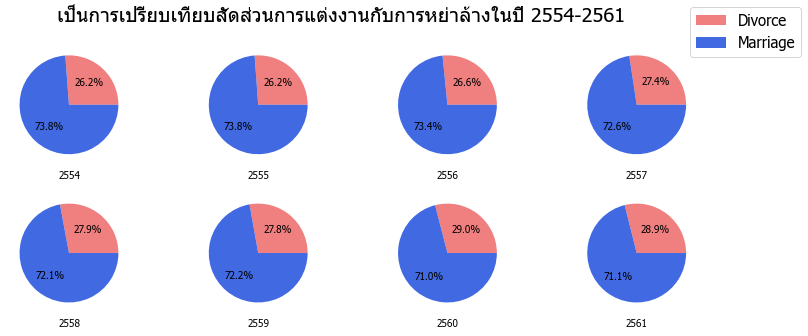

In [39]:
#การจัดเตรียมข้อมูลเพื่อนำไปplot
color = ['lightcoral', 'royalblue']
text = ['Divorce','Marriage']
labels = text
#การplotขึ้นมา
fig, axs = plt.subplots(2, 4,figsize=(13,5))
fig.suptitle('เป็นการเปรียบเทียบสัดส่วนการแต่งงานกับการหย่าล้างในปี 2554-2561',fontsize=20)
#เป็นการสร้างloob เงื่อไขในการplot กราฟลงไปในsubplotนั้นๆ
x=0
y=-1
for i in range(len(df_Div_Mar.index)):
    if y < 3:
        y += 1
        axs[x,y].pie(df_Div_Mar.loc[int(df_Div_Mar.index[i]),['divorce_total','marriage_total']]
                     ,colors=color,autopct = '%1.1f%%')#เป็นการสร้างpie chart
        axs[x, y].set_xlabel(df_Div_Mar.index[i])#เป็นการเขียนกำกลับด้านล่างของแต่ละกราฟว่าเป็นของปีอะไร
    elif y>= 3 :
        x=1
        y=0
        axs[x,y].pie(df_Div_Mar.loc[int(df_Div_Mar.index[i]),['divorce_total','marriage_total']]
                     ,colors=color,autopct = '%1.1f%%')#เป็นการสร้างpie chart
        axs[x, y].set_xlabel(df_Div_Mar.index[i])#เป็นการเขียนกำกลับด้านล่างของแต่ละกราฟว่าเป็นของปีอะไร
plt.rcParams['font.family']='tahoma'
fig.legend(labels, loc="upper right",fontsize=15)#เป็นการแสดงชื่อของกลุ่มที่ข้อมูลว่าสีแต่ละสีหมายถึงข้อมูลอะไร
plt.show()

   จากกราฟด้านบนจะบ่งบอกให้รู้ว่าในแต่ละปีที่ผ่านมาตั้งแต่2554 จนถึง 2561 จะเห็นได้ว่าอัตราการแต่งานมีสัดส่วนที่เยอะกว่าการหย่าล้างแต่ในทางกลับกันเราจะเห็นว่ายิ่งเวลาผ่านไปสัดส่วนของการหย่าล้างยิ่งเพิ่มขึ้นแสดงให้เห็นว่าประชากรแต่งงานเร็วเกินไปหรืออาจจะยังไม่ได้มีการเตรียมความพร้อมในการใช้ชีวิตคู่มากพอ

### กราฟแสดงการเปลียบเทียบการแต่งงานการหย่างเเต่ละภูมิภาค
   -เป็นการplotกราฟที่นำข้อมูลมาจัดกลุ่มตามภูมิภาคต่างแล้วหาผลรวมของแต่งละภูมิภาคนั้นโดยใช้ให้ข้อมูลในส่วนของการหย่าล้างและการแต่งงานมาใช้โดยกราฟที่ใช้จะเป็นกราฟประเภทbar chart

<ipython-input-40-95d82b7bdeba>:19: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(False, color='black')


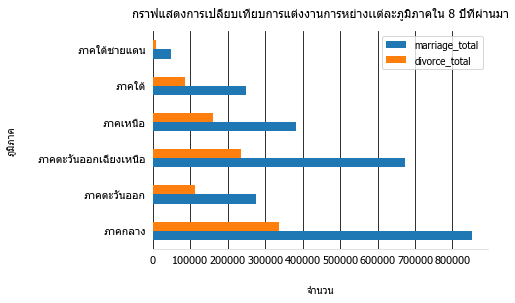

In [40]:
#เป็นการเตรียมข้อมูล
df=df_MARRIAGE.join(df_DIVORCE[['divorce_total']])
data=df.groupby('region_name_th').sum()
# ทำการplotกราฟ
ax = data.plot.barh(fontsize=11)
#เป็นการตกแต่งกราฟโดยกำชื่อแกน และtitle
ax.set_xlabel('จำนวน', labelpad=20)
ax.set_ylabel('ภูมิภาค', labelpad=20)
ax.set_title('กราฟแสดงการเปลียบเทียบการแต่งงานการหย่างเเต่ละภูมิภาคใน 8 ปีที่ผ่านมา', pad=15)
plt.rcParams['font.family']='tahoma' #เป็นการทำให้การplotยอมรับภาษาไทย
# เป็นการกำหนดเส้นสเกลพื้นหลัง
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False, color='black')
plt.show()

จากกราฟด้านบนท่ีแสดงจำนวนการหย่าและการแต่งงานของแต่ละภูมิภาคจะเห็นได้ว่าคนภาคกลางมีจำนวนการแต่งงานเป็นอันดับ1และลองลงมาเป็นภาคตะวันออกเฉียงเหนือนแต่ถ้าเราสังเกตุดีๆจะพบว่าการแต่งงานของภาคกลางต่างมากๆเมื่อเทียบกับภาคตะวันออกเฉียงเหนือนแต่การหย่าล้างถาคกลางมีความแตกต่างไม่มากนักกับภาคตะวันออกเฉียงเหนือนทำให้เรารู้ว่าภาคกลางในการตัดสินใจในการที่จะเเต่งานน่าจะต้องมีการเตรียมความพร้อมในการใช้ชีวิตคู่มาก่อนแล้วทำให้เกิดการหย่าที่ไม่เยอะกว่าที่ควรจะเป็นเมื่อเทียบกับจำนวนของการแต่งงาน

### แสดงการแนวโน้มของการแต่งงานและการหย่าล้าง
   -เป็นการนำข้อมูลผลรวมของทุกปีทางด้านการหย่าล้างและการแต่งงามมาทำการplot Line Chart เพื่อที่จะมาใช้ในการดูแนวโน้ม

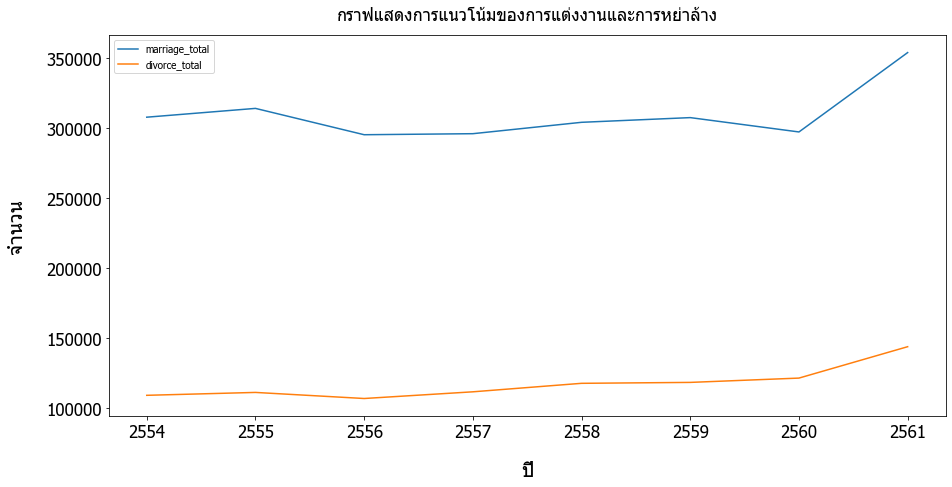

In [41]:
#การเตรียมข้อมูล
df=df_MARRIAGE.join(df_DIVORCE[['divorce_total']])
fig, ax = plt.subplots(figsize=(15,7))
#การplot กราฟ
df.groupby('year').sum().plot(ax=ax,fontsize=17)
#เป็นการตกแต่งกราฟโดยกำชื่อแกน และtitle
ax.set_xlabel('ปี', labelpad=20,fontsize=20)
ax.set_ylabel('จำนวน', labelpad=20,fontsize=20)
ax.set_title('กราฟแสดงการแนวโน้มของการแต่งงานและการหย่าล้าง', pad=15,fontsize=17)
plt.rcParams['font.family']='tahoma' #เป็นการทำให้การplotยอมรับภาษาไทย


จากกราฟจะแสดงแดงแนวโน้มของการหย่าและการแต่งงานจะทำให้เราเห็นว่ายิ่งเวลาผ่านไปการหย่าและการแต่งงานมีแนวโน้มที่เพิ่มขึ้น

## อายุเเรงงานในตลาด

### วิเคราะห์แนวโน้มข้อมูลของทุกกลุ่มอายุที่ทำงานในและนอกระบบ
   -โดยจะทำการหาผลรวมเเยกของแต่ละกลุ่มช่วงอายุในแต่ละปีและแบ่งแยกเพศออกเป็นชายและหญิงเพื่อมาใช้ในการplot line chart 

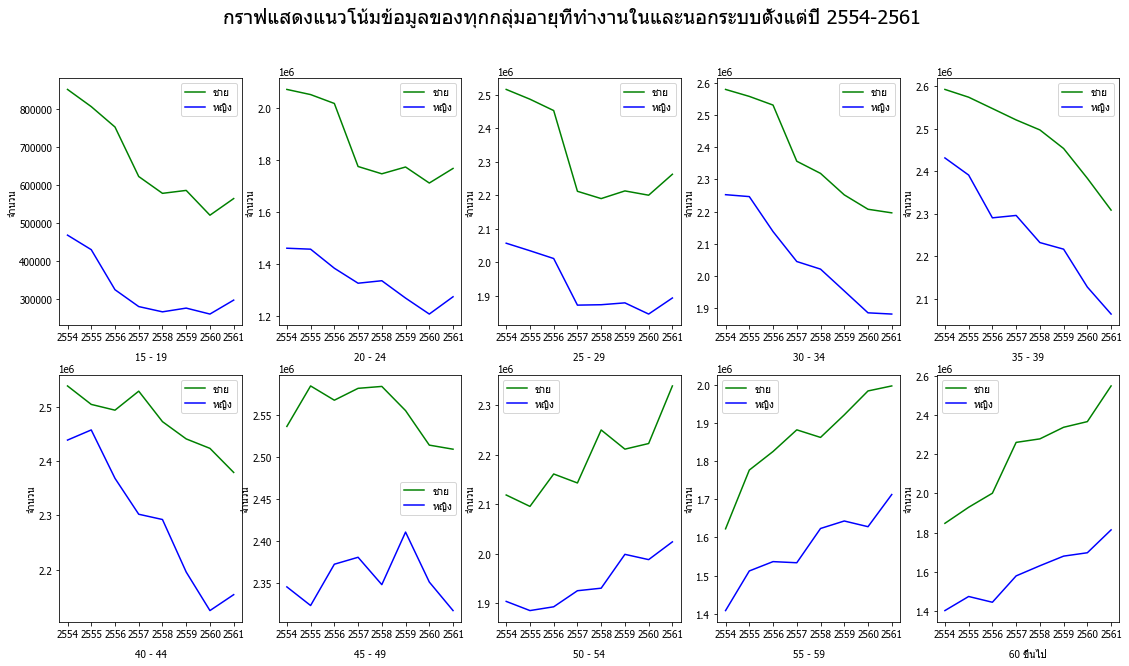

In [42]:
#เป็นการplotข้อมูลออกมา
fig, axs = plt.subplots(2,5,figsize=(19,10))
x=0
y= -1
for i in df_INFORMAL_EMPLOYMENT['age_group_desc_th'].unique():
    if y < 4:
        y+=1
        axs[x,y].plot(df_INFORMAL_EMPLOYMENT['year'].unique(),
             df_INFORMAL_EMPLOYMENT[(df_INFORMAL_EMPLOYMENT['gender_name_th']=='ชาย')&
            (df_INFORMAL_EMPLOYMENT['age_group_desc_th']==i)].groupby('year').sum(),color='g' ,label='ชาย')
        axs[x,y].plot(df_INFORMAL_EMPLOYMENT['year'].unique(),df_INFORMAL_EMPLOYMENT \
            [(df_INFORMAL_EMPLOYMENT['gender_name_th']=='หญิง')
             &(df_INFORMAL_EMPLOYMENT['age_group_desc_th']==i)].groupby('year').sum(),color='b' ,label='หญิง')
        axs[x,y].set_xlabel(i, labelpad=10,fontsize=10)
        axs[x,y].set_ylabel('จำนวน', labelpad=2,fontsize=10)
        axs[x,y].legend()
    elif y>=4:
        y=0
        x+=1
        axs[x,y].plot(df_INFORMAL_EMPLOYMENT['year'].unique(),
             df_INFORMAL_EMPLOYMENT[(df_INFORMAL_EMPLOYMENT['gender_name_th']=='ชาย')&
            (df_INFORMAL_EMPLOYMENT['age_group_desc_th']==i)].groupby('year').sum(),color='g' ,label='ชาย')
        axs[x,y].plot(df_INFORMAL_EMPLOYMENT['year'].unique(),df_INFORMAL_EMPLOYMENT \
            [(df_INFORMAL_EMPLOYMENT['gender_name_th']=='หญิง')
             &(df_INFORMAL_EMPLOYMENT['age_group_desc_th']==i)].groupby('year').sum(),color='b' ,label='หญิง')
        axs[x,y].set_xlabel(i, labelpad=10,fontsize=10)
        axs[x,y].set_ylabel('จำนวน', labelpad=2,fontsize=10)
        axs[x,y].legend(fontsize=10)

#เป็นในส่วนของการตกแต่งและกำหนดชื่อ
fig.suptitle('กราฟแสดงแนวโน้มข้อมูลของทุกกลุ่มอายุที่ทำงานในและนอกระบบตั้งแต่ปี 2554-2561',fontsize=20)
plt.legend()
plt.show()




จากกราฟด้านบนจะทำให้เราจะเห็นได้ว่าจะมีจำนวนที่มีงานทำเพศชายจะเยอะกว่าเพศหญิงและแนวโน้มของช่วงอายุตั้งแต่50ปีขึ้นไปมีแนวโน้มที่เพิ่มมากขึ้นอย่างมากเมื่อเทียบกับกลุ่มอายุกลุ่มอื่นแสดงให้เราเห็นถึงว่าประชากรในประเทศไทยเริ่มจะมีคนที่ทำงานอยู่ที่อายุ50ปีขึ้นไปมากยิ่งขึ้น

### สัดสวนของคนที่ทำงานในแต่ละช่วงอายุ
-ในการplotกราฟจะใช้การแบ่งกลุ่มโดยจะแบ่งตามช่วงอายุของคนที่ทำงานโดยจะมาใช้ในการเปรียบเทียบหาว่าในแต่ละช่วงอายุมีสัดส่วนเป็นอย่างไร

<ipython-input-43-8c5b5f049073>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(data,labels=data.index,autopct='%1.1f%%',shadow=True, startangle=90)


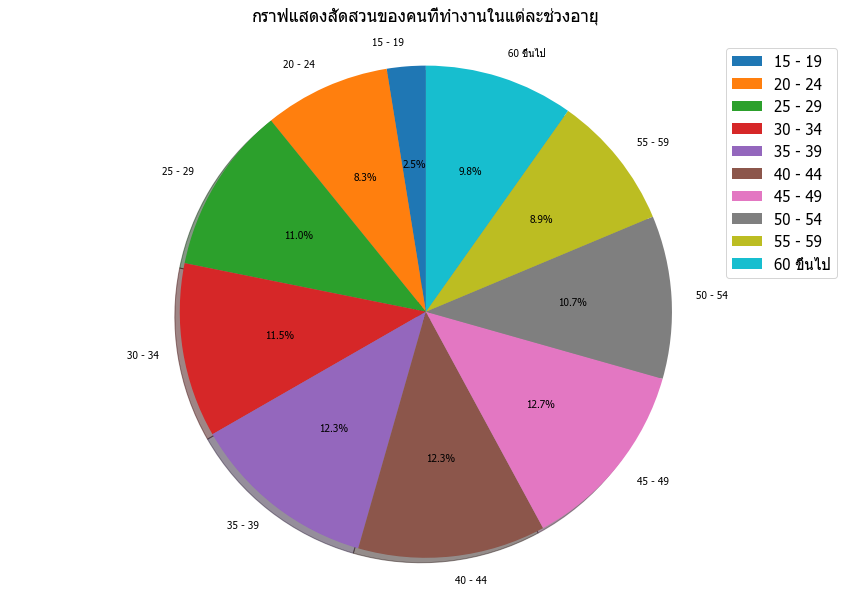

In [43]:
# การเตรียมข้อมูลและการplot
fig1, ax1 = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
data =df_INFORMAL_EMPLOYMENT.groupby('age_group_desc_th').sum()
ax1.pie(data,labels=data.index,autopct='%1.1f%%',shadow=True, startangle=90)
# เป็นการตกแต่งกราฟโดยกำหนดชื่อแกน x และy และแสดงชื่อกลุ่ม
ax1.legend(fontsize=15)
plt.rcParams['font.family']='tahoma'
ax1.set_title("กราฟแสดงสัดสวนของคนที่ทำงานในแต่ละช่วงอายุ",pad=20,fontsize=17)
ax1.axis('equal')
plt.show()

เมื่อเปรียบเทียบดูจากสัดส่วนผู้สูงอายุจะเห็นได้ว่าตอนนี้กลุ่มอายุของผู้ที่ทำงานจะอยู่ในช่วงของวัยกลางคนโดยมีแนวโน้มเปลี่ยนเป็นผู้สูงอายุมากขึ้นโดยช่วงวัยจะมีเกณฑ์แบ่งตามนี้

1 วัยเด็ก 0-18

2 วัยผู้ใหญ่ตอนต้นหรือวัยฉกรรจ์ 18-35

3 วัยผู้ใหญ่ตอนกลางหรือวัยกลางคน 35-60

4 วัยผู้ใหญ่ตอนปลายหรือวัยชรา 60 ขึ้นไป

โดยที่นำเกณฑ์มาจากเว็บ https://sites.google.com/site/karceriyteibtokhxngmnusy/home/kar-ceriy-teibto-laea-phathnakar-khxng-phuhiy

## การวิเคราะห์การเกิดการตาย

### การเปรียบเทียบจำนวนการตายกับการเกิดในแต่ละปี
-โดยจะทำการหาผลรวมในเเต่ละปีว่ามีการเกิดและการตายเท่าไร มาทำการplot bar chart เปรียบเทียบคู่กันในแต่ละปี

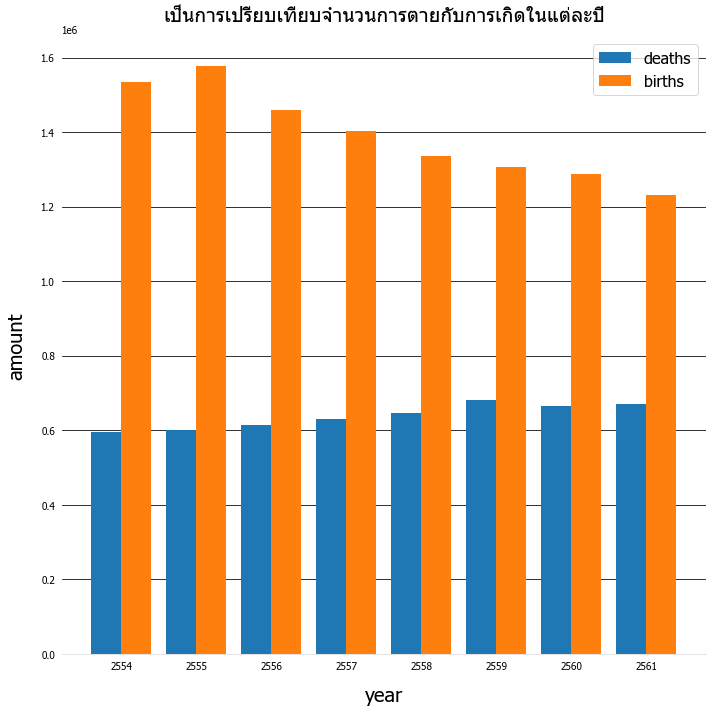

In [44]:
# การเตรียมข้อมูล
x=np.arange(len(df_DEATHS.year.unique()))
fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.4
#เป็นการplotข้อมูลโดยที่plotเหมือนกันทั้งสองอันแต่อันที่สองมีการขยับตำแห่งแกนให้เลื่อนไปอยู่ข้างแกนแรก
b1 = ax.bar(x,df_DEATHS.groupby('year').deaths_total.sum(),width=bar_width, label='deaths')
b2 = ax.bar(x + bar_width, df_LIVE.groupby('year').births_total.sum(), width=bar_width, label='births')

# เป็นการfixตำแหน่งของกราฟและกำหนดชื่อกลุ่มลงไปในแกรนx
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_DEATHS.year.unique())

# เป็นการแสดงชื่อกลุ่ม
ax.legend(fontsize=16)

# # Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='black')
ax.xaxis.grid(False)

# เป็นการเพิ่มชื่อแกนแต่ละอันเข้าไปและกำหนดtitle
ax.set_xlabel('year', labelpad=15,fontsize=20)
ax.set_ylabel('amount', labelpad=15,fontsize=20)
ax.set_title('เป็นการเปรียบเทียบจำนวนการตายกับการเกิดในแต่ละปี', pad=15,fontsize=20)

fig.tight_layout()
# df_DEATHS.region_name_th.unique()

จากกราฟเราจะได้ว่าในแต่ละปีจะมีการเกิดและมีการต่ายเท่าไรโดยเราจะเห็นได้เลยว่าในแต่ละปีจะมีจำนวนการเกิดมากกว่าการตายโดยที่เราจะสังเกตุเห็นได้ว่าการเกิดมีจำนวนที่ลดลงแต่การตายมีจำนวนที่เพิ่มมากขึ้น

### การเปรียบเทียบสัดส่วนการเกิดในแต่ละปี

<ipython-input-45-7cbbfc8df889>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  axs.pie(marriage_born,labels=marriage_born.index,autopct='%1.1f%%',shadow=True, startangle=90)


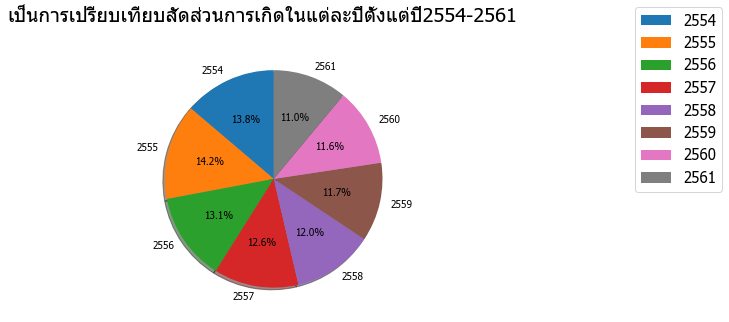

In [45]:
#การจัดเตรียมข้อมูลเพื่อนำไปplot
color = ['lightcoral', 'royalblue']
marriage_born=df_LIVE.groupby('year').sum()
#การplotขึ้นมา
fig, axs = plt.subplots(figsize=(13,5))
fig.suptitle('เป็นการเปรียบเทียบสัดส่วนการเกิดในแต่ละปีตั้งแต่ปี2554-2561',fontsize=20)
axs.pie(marriage_born,labels=marriage_born.index,autopct='%1.1f%%',shadow=True, startangle=90)
fig.legend(marriage_born.index, loc="upper right",fontsize=15)#เป็นการแสดงชื่อของกลุ่มที่ข้อมูลว่าสีแต่ละสีหมายถึงข้อมูลอะไร
plt.show()

จากกราฟเราจะเห็นได้ว่าในแต่ละปีจะมีการอัตราการเกิดที่ลดลงอย่างเห็นได้ชัดเจน

## การวิเคราะห์ประชากรทั้งหมด

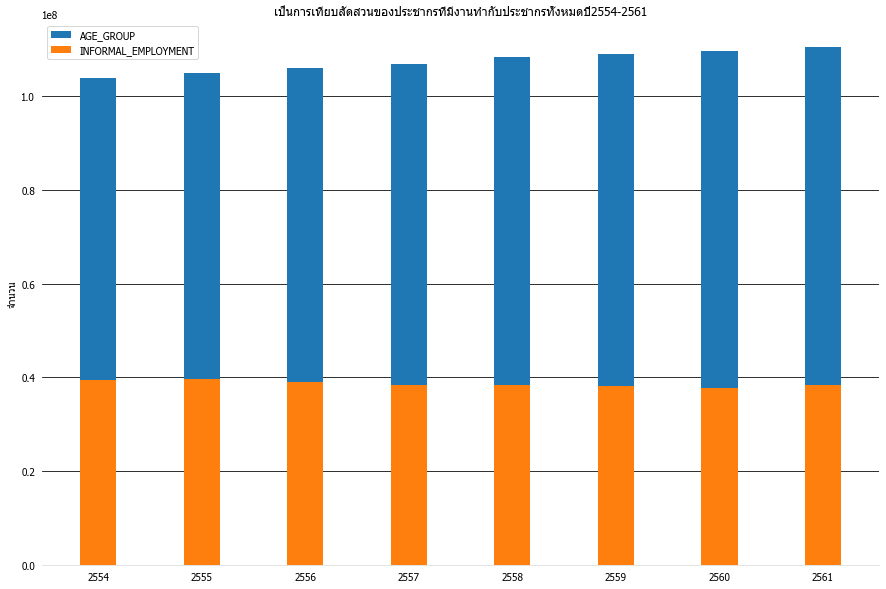

In [46]:
# การเตรียมข้อมูล
width = 0.35    # ความกว้างของแท่ง
fig, ax = plt.subplots(figsize=(15, 10))
x=df_AGE_GROUP.year.unique()
y1=df_AGE_GROUP.loc[df_AGE_GROUP.age_group_desc_th!='วัยเด็ก (0-14 ปี)'].groupby('year').sum().population_total
y2=df_INFORMAL_EMPLOYMENT.groupby('year').sum().labour_total
#เป็นการplotกราฟ
ax.bar(x,y1,width, label='AGE_GROUP')
ax.bar(x, y2, width,label='INFORMAL_EMPLOYMENT')
# เป็นการกำหนดtitleและชื่อแกนyลงไป
ax.set_ylabel('จำนวน')
ax.set_title('เป็นการเทียบสัดสวนของประชากรที่มีงานทำกับประชากรทั้งหมดปี2554-2561')
# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='black')
ax.xaxis.grid(False)
# เป็นการแสดงชื่อกลุ่ม
ax.legend()
plt.show()

จากกราฟจะแสดงให้เราเห็นว่าประชากรในประเทศมีจำนวนมากยิ่งขึ้นแต่ในส่วนของประชากรที่ทำงานนั้นมีสัดส่วนลดลงเล็กน้อยเมื่อเทียบกับปีก่อนๆโดยการเปรียบเทียบแบบนี้อาจจะยังไม่สามารถสรุปได้แน่นชัดเพราะว่าข้อมูลในส่วนประชากรที่เก็บจะเป็นช่วงกว่างสามช่วงคือ (15-59), (60ขึ้นไป) และ (ระบุบไม่ได้)
โดยที่ในส่วนของช่วง15-22 อาจจะยังไม่ทำงานก็เป็นได้เพราะยังอยู่ในช่วงเรียนหนังสือทำให้จำนวนประชากรที่ว่างงานมีมากจนเกินไป

## Summary

ข้อสรุปที่ได้จากการวิเคราะห์กลุ่มประชากรภายในประเทศโดยจากที่ทำการวิเคราะห์ในแต่ละหัวข้อผลลัพธ์ที่ได้จะได้ดังนี้

* ในส่วนของการสมรสจะเห็นว่าอัตราการหย่าล้างเพิ่มมากยิ่งขึ้นทำให้เรารับรู้ได้ว่าอาจจะเกิดการแต่งงานที่ตัดสินใจเร็วจนเกินไปหรืออาจจะอยู่ที่ความพร้อมของคู่นั้นว่าอาจจะยังไม่มีความพร้อมที่มาเพียงพอจนทำให้เกิดการหย่าล้างเกิดขึ้น

* ในส่วนของประชากรที่ทำงานทั้งในและนอกระบบตอนนี้เริ่มเข้าสู่ช่วงอายุของวัยกลางคนโดยเป็นช่วงระหว่าง(35-59)และอาจจะมีแนวโน้มเป็นสังคมผู้สูงอายุก็เป็นได้และสิ่งที่ทำให้เราเห็นอีกส่วนของสังคมการทำงานในไทยจะเห็นได้ว่าเพศชายจะยังมีจำนวนคนที่ทำงานมากว่าในส่วนของผู้หญิง 

* ในส่วนของการเกิดการตายในประเทศไทยเราจะเห็นว่าจำนวนการต่ายมีเเนวโน้มเพิ่มมากยิ่งขึ้นเมื่อเวลาผ่านไปนานเข้าแต่อัตราการเกิดกับลดตำ่ลงซึ่งสวนทางกับอัตราการแต่งงานที่มีแนวโน้มมากยิ่งขึ้นทำให้รู้ว่าประชากรไทยนิยมมีลูกน้อยลงเป็นครอบครัวขนาดเล็กสะส่วนใหญ่

* ส่วนสุดท้ายคือในส่วนของคนว่างงานคือในส่วนนี้อาจจะยังไม่สามารถสรุปได้เเน่ชัดเป็นเพราะว่าการยังมีบางช่วงอายุที่เก็บยังคงต่องมีการเรียนอยู่เลยทำให้งานส่วนใหญ่ยังไม่ถึงเกณฑ์ที่จะเข้าทำงานได้ทำให้มีจำนวนคนที่ว่างงานเป็นจำนวนมาก